## Import

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Make Hazy Data

In [2]:
def get_file_name(path):
    basename = os.path.basename(path)
    onlyname = os.path.splitext(basename)[0]
    return onlyname

def gen_haze(img, depth_img):
    
    depth_img_3c = np.zeros_like(img)
    depth_img_3c[:,:,0] = depth_img
    depth_img_3c[:,:,1] = depth_img
    depth_img_3c[:,:,2] = depth_img

    beta = random.randint(100,150)/100
    norm_depth_img = depth_img_3c/255
    trans = np.exp(-norm_depth_img*beta)

    A = 255
    hazy = img*trans + A*(1-trans)
    hazy = np.array(hazy, dtype=np.uint8)
    
    return hazy

val01-25-20-1-FRONT


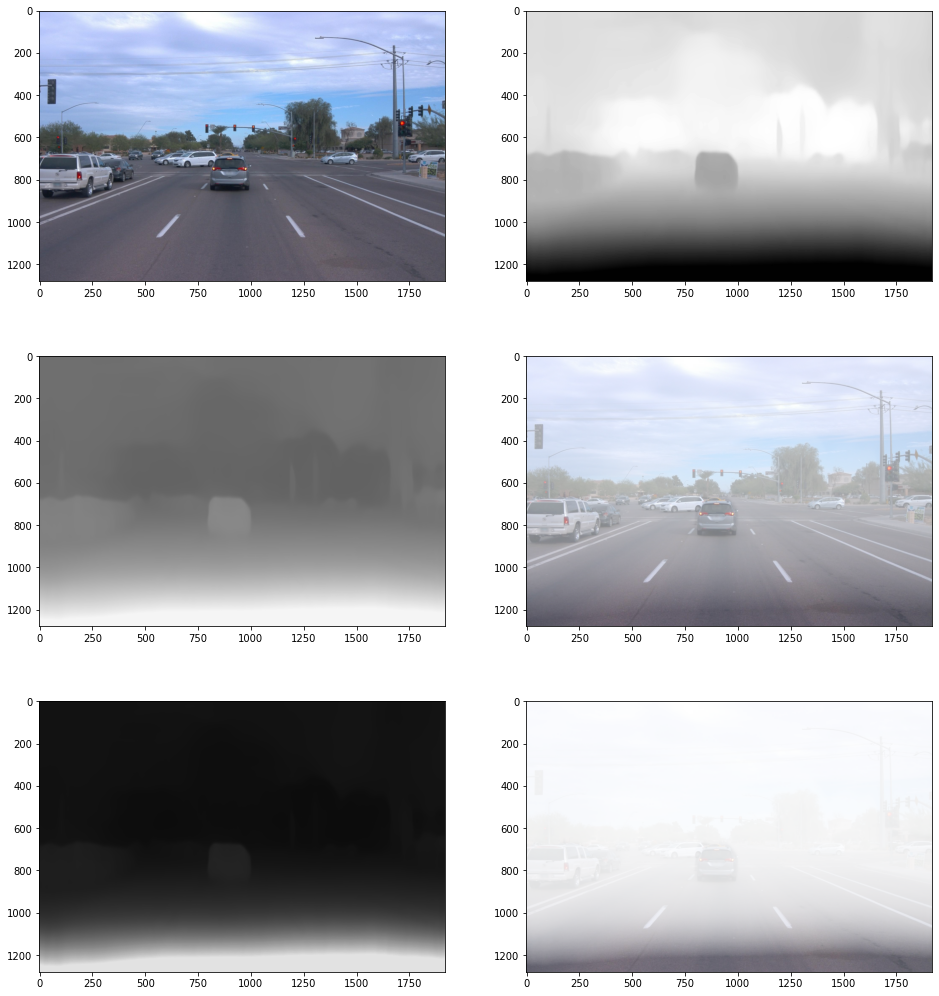

In [3]:
fname = "val01-25-20-1-FRONT"
path = f"data/{fname}.jpg"

print(fname)

img = plt.imread(path)

depth_path = f"data/{fname}_depth.jpg"
depth_img = plt.imread(depth_path)

depth_img_3c = np.zeros_like(img)
depth_img_3c[:,:,0] = depth_img
depth_img_3c[:,:,1] = depth_img
depth_img_3c[:,:,2] = depth_img

beta=0.95
norm_depth_img = depth_img_3c/255
trans = np.exp(-norm_depth_img*beta)

beta2=3.0
trans2 = np.exp(-norm_depth_img*beta2)

A = 255
hazy = img*trans + A*(1-trans)
hazy = np.array(hazy, dtype=np.uint8)

hazy2 = img*trans2 + A*(1-trans2)
hazy2 = np.array(hazy2, dtype=np.uint8)

plt.figure(figsize=(16,18))
plt.subplot(321), plt.imshow(img)
plt.subplot(322), plt.imshow(depth_img, cmap="gray")
plt.subplot(323), plt.imshow(trans, cmap="gray")
plt.subplot(324), plt.imshow(hazy)
plt.subplot(325), plt.imshow(trans2, cmap="gray")
plt.subplot(326), plt.imshow(hazy2)
plt.show()

In [ ]:
# cv2.imwrite(f"{fname}_syn.jpg", cv2.cvtColor(hazy2, cv2.COLOR_BGR2RGB))